In [1]:
import os
import sys
import time
from skimage import io
from skimage.color import rgb2gray
from blockmatching import *
from utils import compute_census
import matplotlib.pyplot as plt
import cv2
from blockmatching import *
from utils import *

%load_ext autoreload
%autoreload 2

In [19]:
mode = "cones"
Ig = f"../{mode}/im2.png"
Id = f"../{mode}/im6.png"
gt = f"../{mode}/disp2.png"
occl = f"../{mode}/occl.png"

Ig = cv2.imread(Ig, cv2.IMREAD_GRAYSCALE)
Id = cv2.imread(Id, cv2.IMREAD_GRAYSCALE)
gt = cv2.imread(gt, cv2.IMREAD_GRAYSCALE)
occl = cv2.imread(occl, cv2.IMREAD_GRAYSCALE)

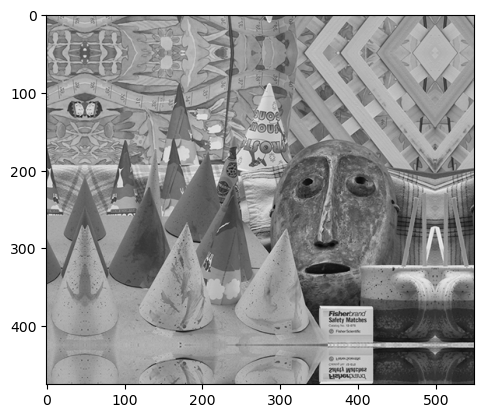

In [20]:
from utils import add_mirror_padding

N = 50

Ig = add_mirror_padding(Ig, N)
plt.imshow(Ig, cmap="gray")
plt.imsave("output/mirror.png",Ig, cmap="gray")


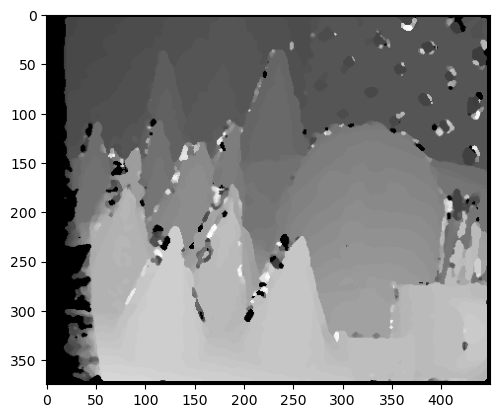

In [64]:
N = 7

# Ig_mir = add_mirror_padding(Ig, N)
# Id_mir = add_mirror_padding(Id, N)

# print("Mirror done")

# Ig, Id = compute_census(Ig, Id, (3,3))
# disp_mirror = block_matching_mirror(Ig_mir, Id_mir, N, 64, ZSSD)
disp_regular = block_matching(Ig, Id, N, 64, ZSSD)

disp_regular = cv2.medianBlur(disp_regular,5)

# disp_mirror = mode_filter(disp_mirror, 11)
# disp_regular = mode_filter(disp_regular, 11)

# disp_mirror = np.interp(disp_mirror, (0, np.max(disp_mirror)), (0, 255)).astype(np.uint8)
disp_regular = np.interp(disp_regular, (0, np.max(disp_regular)), (0, 255)).astype(np.uint8)
disp_regular = np.where(disp_regular <= 56, 0, disp_regular)

# io.imsave("test.png", disp)
plt.imshow(disp_regular, cmap="gray")

In [63]:
from evaldisp import evaldisp
evaldisp(gt, occl, disp_regular)

(4.800999029167797, 0.9396859259259259, 0.9086222222222222)

In [44]:
res_teddy = []
disp = disp_regular
for i in tqdm(range(0,120, 4)):
    filtered_disp = np.where(disp <= i, 0, disp)
    errmoy, ps1, ps2 = evaldisp(gt, occl, filtered_disp)
    res_teddy.append((i, errmoy, ps1, ps2))

100%|██████████████████████████████████████████| 30/30 [00:00<00:00, 237.79it/s]


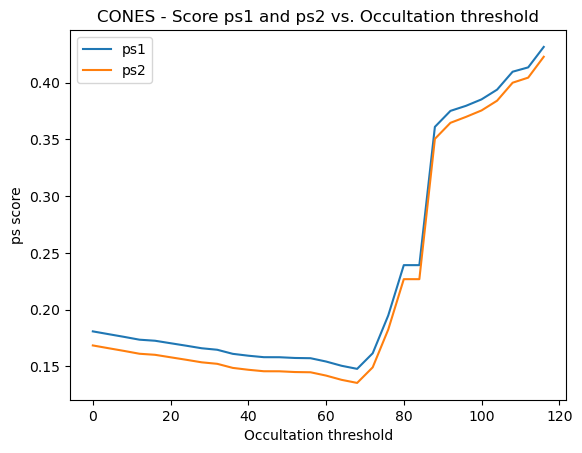

In [48]:
res = np.array(res)
### Create the plot
# plt.plot(res[:,0], res[:,1], label='pixel accuracy')
plt.plot(res[:,0], res[:,2], label='ps1')
plt.plot(res[:,0], res[:,3], label='ps2')
# plt.plot(x, y2, label='Line 2')

# Add title and legend
plt.title('CONES - Score ps1 and ps2 vs. Occultation threshold')
plt.xlabel("Occultation threshold")
plt.ylabel("ps score")
plt.legend()

# Show the plot
plt.savefig("output/cones_ps1_ps2_occ.pdf")

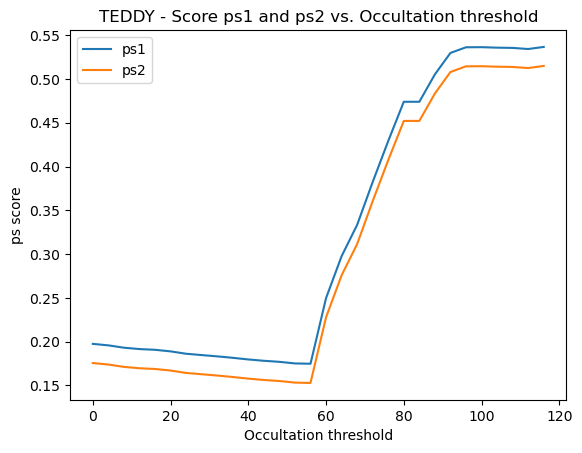

In [49]:
res_teddy = np.array(res_teddy)
### Create the plot
# plt.plot(res[:,0], res[:,1], label='pixel accuracy')
plt.plot(res_teddy[:,0], res_teddy[:,2], label='ps1')
plt.plot(res_teddy[:,0], res_teddy[:,3], label='ps2')
# plt.plot(x, y2, label='Line 2')

# Add title and legend
plt.title('TEDDY - Score ps1 and ps2 vs. Occultation threshold')
plt.xlabel("Occultation threshold")
plt.ylabel("ps score")
plt.legend()

# Show the plot
plt.savefig("output/teddy_ps1_ps2_occ.pdf")

In [46]:
np.argmin(res_teddy[:,2])

14

In [47]:
res_teddy[14]

array([56.        ,  0.77111456,  0.17478519,  0.15288889])

In [39]:
res[17]

array([68.        ,  0.76709494,  0.14775704,  0.13536   ])

In [15]:
res = np.array([[3, 5.17, 42.96, 40.17], [5, 2.07, 26.47, 23.83], [7, 1.5, 24.99, 21.66], [9, 1.38, 25.81, 22.19], [11, 1.39, 26.97, 23.16],
                [13, 1.42, 28.29, 24.20], [15, 1.47, 29.7, 25.23], [17, 1.54, 31.10, 26.28]])

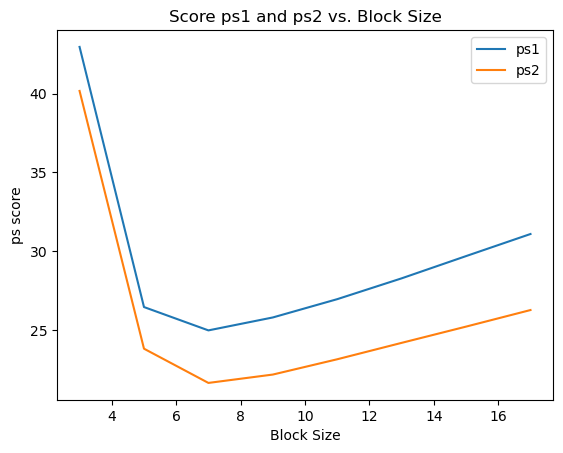

In [17]:
res = np.array(res)
### Create the plot
# plt.plot(res[:,0], res[:,1], label='pixel accuracy')
plt.plot(res[:,0], res[:,2], label='ps1')
plt.plot(res[:,0], res[:,3], label='ps2')
# plt.plot(x, y2, label='Line 2')

# Add title and legend
plt.title('Score ps1 and ps2 vs. Block Size')
plt.xlabel("Block Size")
plt.ylabel("ps score")
plt.legend()

# Show the plot
plt.savefig("output/ps1_ps2_block_size.pdf")